# Рассмотрим сделки по К+, с 2018 по 2022 год

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os import listdir
from os.path import isfile, join

кодТО 454934 выручка за 2022 год отрицательная -1691000.0

In [2]:
mypath=r'C:\Users\samoray\Python\Системы К\Сделки'
names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
len(names)
names

['2018.xlsx', '2019.xlsx', '2020.xlsx', '2021.xlsx', '2022.xlsx']

In [3]:
excl_list=[]
for i in names:
    file=f'{mypath}\{i}'
    data=pd.read_excel(file)
     # Год
    Year=i[:i.index('.')]
    data["Год_сделки"] = int(Year)
    excl_list.append(data)

In [4]:
result = pd.concat(excl_list)
result.shape

(6978, 19)

In [5]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6978 entries, 0 to 1408
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Ссылка                  6978 non-null   object        
 1   ПометкаУдаления         6978 non-null   object        
 2   Код                     6978 non-null   int64         
 3   ИНН                     6824 non-null   object        
 4   Наименование            6978 non-null   object        
 5   ВидДеятельности         1621 non-null   object        
 6   ЮрФизЛицо               6978 non-null   object        
 7   СистемаНалогообложения  3826 non-null   object        
 8   ВыручкаОтПродаж         5254 non-null   float64       
 9   КодОКВЭД                984 non-null    object        
 10  Адрес                   6970 non-null   object        
 11  РегионОбслуживания      6978 non-null   object        
 12  Статус                  6978 non-null   object  

In [6]:
# Заменим СистемаНалогообложения пустые значения на не известно 
result['СистемаНалогообложения'].fillna('Не известно', inplace=True)

In [7]:
data_n_cnt=result.groupby('СистемаНалогообложения',as_index=False) \
.aggregate({'Код':"count"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by='Количество сделок', ascending=False)
data_n_cnt

,СистемаНалогообложения,Количество сделок
4,Не известно,3152
5,ОСНО,2171
9,УСНО 6%,669
8,УСНО 15%,417
6,"ОСНО,УСНО",297
1,Бюджет,214
2,ЕНВД,22
3,ЕСХН,22
0,Аутсорсинг,10
7,Патент,4


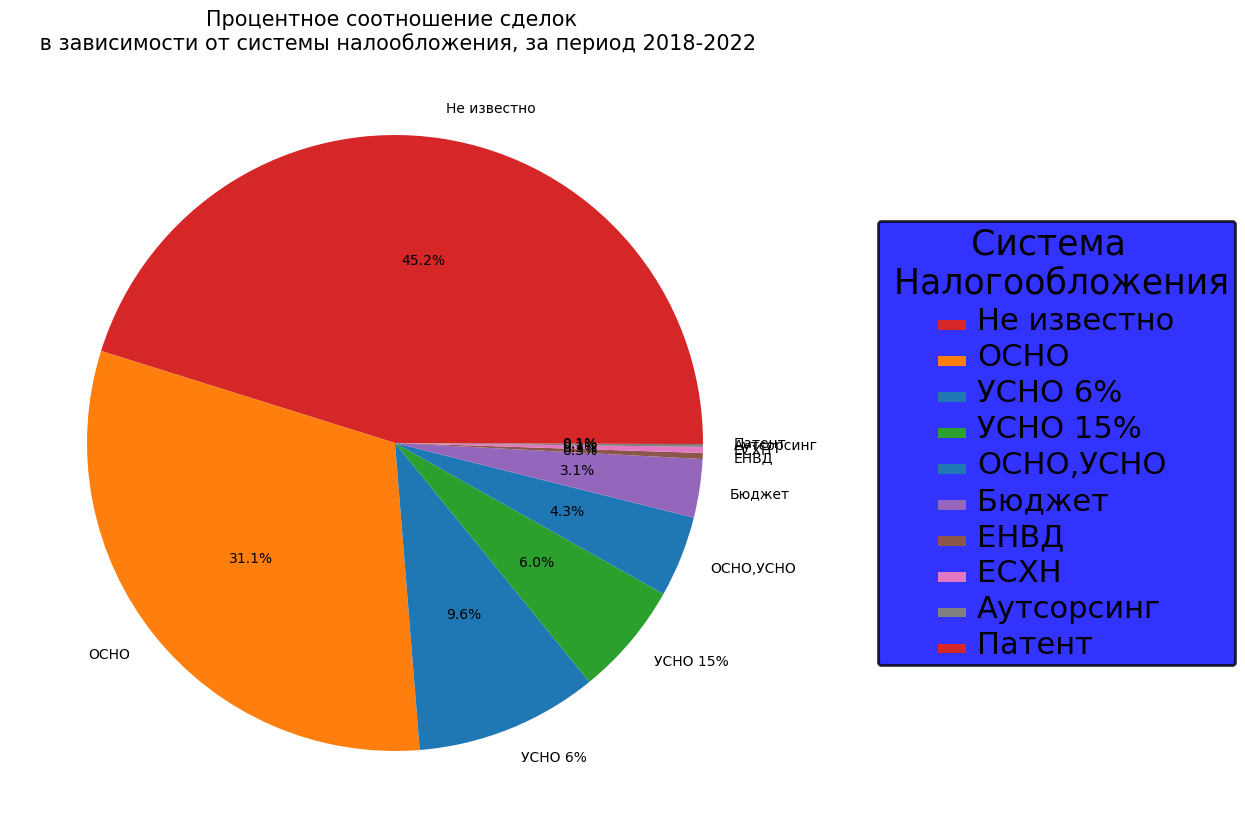

In [8]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['Количество сделок'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("Процентное соотношение сделок \n в зависимости от системы налообложения, за период 2018-2022", fontsize=15)

plt.show()

In [9]:
data_s_cnt=result.groupby('Статус',as_index=False) \
.aggregate({'Код':"count"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by='Количество сделок', ascending=False)
data_s_cnt

,Статус,Количество сделок
0,Действующее,6175
2,Нет информации,403
1,Недействующие,400


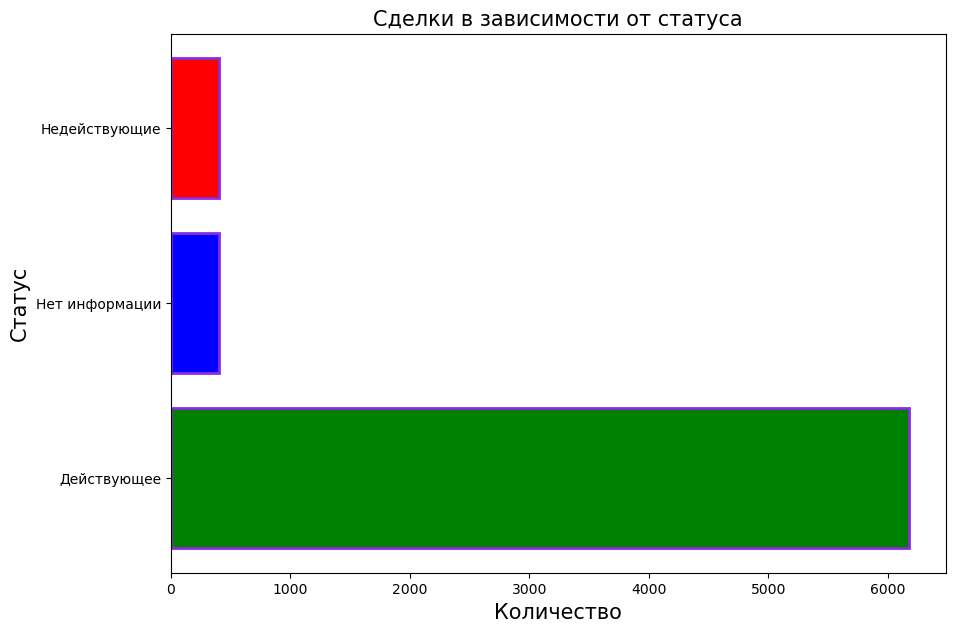

In [10]:
plt.figure(figsize=[10, 7])

plt.barh(data_s_cnt['Статус'], data_s_cnt['Количество сделок'], edgecolor='blueviolet',
        color=['g', 'b', 'r'], linewidth=2)

plt.title('Сделки в зависимости от статуса', fontsize=15)
plt.xlabel('Количество', fontsize=15)
plt.ylabel('Статус', fontsize=15)
# plt.xticks(rotation=90)
plt.show()

# Оставим только те значения, у которых есть ифномрация по выручке
- 5254 значений 

In [11]:
print('Выручка клиентов из официальных источников')
print()
print(result['ВыручкаОтПродаж'].median(),'Медиана по выручке')
print(round(result['ВыручкаОтПродаж'].mean(),2),'Среднее значение по выручке')
print(result['ВыручкаОтПродаж'].max(),'Максимальное значение по выручке')
print(result['ВыручкаОтПродаж'].min(),'Минимальное значение по выручке')

Выручка клиентов из официальных источников

74372000.0 Медиана по выручке
372943266.86 Среднее значение по выручке
127109471000.0 Максимальное значение по выручке
0.0 Минимальное значение по выручке


- Медиана и среднее очень сильно отличаются;
- Медиана меньше в 5 раз, распределение не нормальное;
- Тяжело сделать анализ по выручке.

In [12]:
quantile_15 = result['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = result['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = result['ВыручкаОтПродаж'].quantile(0.25)
median=result['ВыручкаОтПродаж'].median()
quantile_75 = result['ВыручкаОтПродаж'].quantile(0.75)

In [13]:
print('Квартили распределения')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения

У 15% клиентов, у которых была сделка, 
выручка меньше 7780049.999999999
а у 85% больше 7780049.999999999


У 20% клиентов, у которых была сделка, 
выручка меньше 13921000.000000002
а у 80% больше 13921000.000000002


У 25% клиентов, у которых была сделка, 
выручка меньше 20771000.0
а у 75% больше 20771000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 74372000.0
а у 50% больше 74372000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 228350000.0
а у 25% больше 228350000.0


In [14]:
data_i_cnt=result.groupby('ИНН_99',as_index=False) \
.aggregate({'Код':"count"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by='Количество сделок', ascending=False)
data_i_cnt

,ИНН_99,Количество сделок
1,Нет,6941
0,Да,37


Из 6978 сделок за 5 лет:
- ИНН начинающийся с 99 только у 37 контрагентов
- Остальные или не с 99, или пустой ИНН и нет иформации.


In [15]:
data_k_cnt=result.groupby('КодОКВЭД',as_index=False) \
.aggregate({'Код':"count"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by='Количество сделок', ascending=False)
data_k_cnt

,КодОКВЭД,Количество сделок
2,69.20,402
1,69.10,234
0,69,153
4,69.20.2,128
5,69.20.3,47
3,69.20.1,20


In [16]:
data_k_cnt=result.groupby('КодОКВЭД_69',as_index=False) \
.aggregate({'Код':"count"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by='Количество сделок', ascending=False)
data_k_cnt

,КодОКВЭД_69,Количество сделок
1,Нет,5994
0,Да,984


Text(0.5, 1.0, 'КодОКВЭД 69')

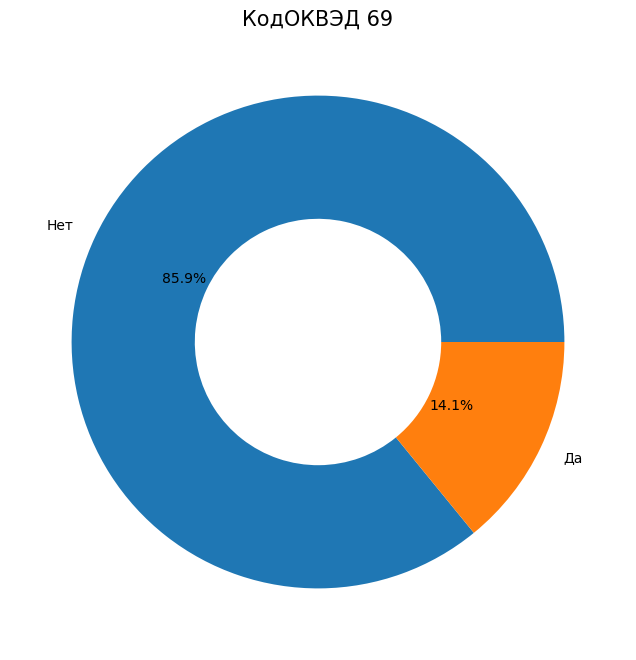

In [17]:
# Визуализация
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(data_k_cnt['Количество сделок'], 
       labels=data_k_cnt['КодОКВЭД_69'], 
       wedgeprops=dict(width=0.5),
       autopct='%1.1f%%')

plt.title('КодОКВЭД 69', fontsize=15) 

In [18]:
num=round(data_k_cnt['Количество сделок'].min()*100/data_k_cnt['Количество сделок'].sum(),2)
print(f'{num} % клиентов из всех сделок, \nза период 5 лет имеют КодОКВЭД 69')

14.1 % клиентов из всех сделок, 
за период 5 лет имеют КодОКВЭД 69


# Система Налогообложения ОСНО

In [19]:
osno=result.loc[((result['ВыручкаОтПродаж']>=0) & (result['СистемаНалогообложения']=='ОСНО'))] 
quantile_15 = osno['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = osno['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = osno['ВыручкаОтПродаж'].quantile(0.25)
median=osno['ВыручкаОтПродаж'].median()
quantile_75 = osno['ВыручкаОтПродаж'].quantile(0.75)

In [20]:
print('Квартили распределения системы налогообложения ОСНО')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 23274300.0
а у 85% больше 23274300.0


У 20% клиентов, у которых была сделка, 
выручка меньше 32549800.0
а у 80% больше 32549800.0


У 25% клиентов, у которых была сделка, 
выручка меньше 43689250.0
а у 75% больше 43689250.0


У 50% клиентов, у которых была сделка, 
выручка меньше 125718500.0
а у 50% больше 125718500.0


У 75% клиентов, у которых была сделка, 
выручка меньше 337875500.0
а у 25% больше 337875500.0


# Система Налогообложения УСНО 6%

In [21]:
osno_6=result.loc[((result['ВыручкаОтПродаж']>=0) & (result['СистемаНалогообложения']=='УСНО 6%'))] 
quantile_15 = osno_6['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = osno_6['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = osno_6['ВыручкаОтПродаж'].quantile(0.25)
median=osno_6['ВыручкаОтПродаж'].median()
quantile_75 = osno_6['ВыручкаОтПродаж'].quantile(0.75)

In [22]:
print('Квартили распределения системы налогообложения ОСНО 6%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО 6%

У 15% клиентов, у которых была сделка, 
выручка меньше 1668000.0
а у 85% больше 1668000.0


У 20% клиентов, у которых была сделка, 
выручка меньше 3135000.0
а у 80% больше 3135000.0


У 25% клиентов, у которых была сделка, 
выручка меньше 4593500.0
а у 75% больше 4593500.0


У 50% клиентов, у которых была сделка, 
выручка меньше 20580000.0
а у 50% больше 20580000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 60906500.0
а у 25% больше 60906500.0


C:\Users\samoray\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


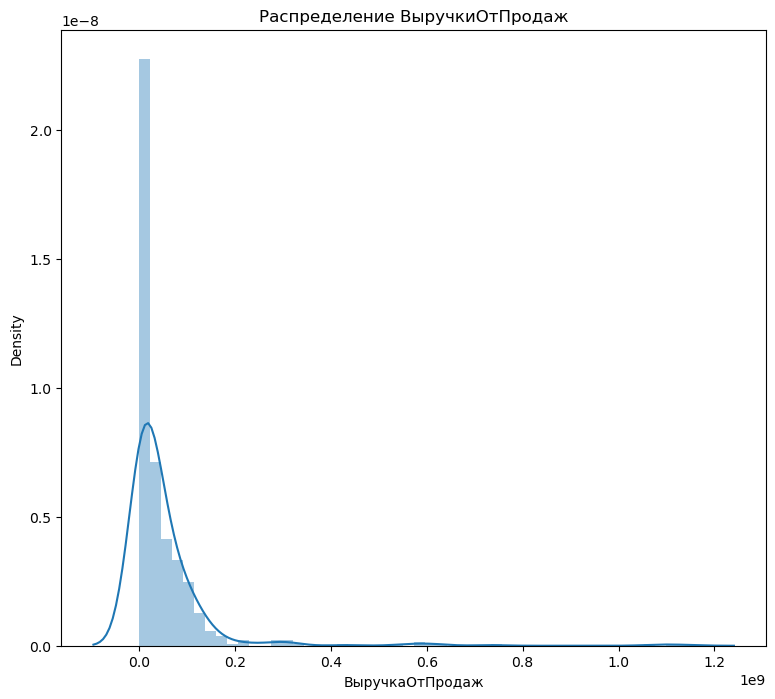

In [23]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Распределение ВыручкиОтПродаж')
sns.distplot(osno_6['ВыручкаОтПродаж'])

# plt.subplot(1,2,2)
# plt.title('Размах и медиана')
# sns.boxplot(y=osno_6['ВыручкаОтПродаж'])

plt.show()

Высокая плотность выручки до 20 млн рублей, после 20 млл разброс плотности разный

# Система Налогообложения УСНО 15%

In [24]:
osno_15=result.loc[((result['ВыручкаОтПродаж']>=0) & (result['СистемаНалогообложения']=='УСНО 15%'))] 
quantile_15 = osno_15['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = osno_15['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = osno_15['ВыручкаОтПродаж'].quantile(0.25)
median=osno_15['ВыручкаОтПродаж'].median()
quantile_75 = osno_15['ВыручкаОтПродаж'].quantile(0.75)

In [25]:
print('Квартили распределения системы налогообложения УСНО 15%%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 15%%

У 15% клиентов, у которых была сделка, 
выручка меньше 6899250.000000001
а у 85% больше 6899250.000000001


У 20% клиентов, у которых была сделка, 
выручка меньше 10269199.999999998
а у 80% больше 10269199.999999998


У 25% клиентов, у которых была сделка, 
выручка меньше 13713250.0
а у 75% больше 13713250.0


У 50% клиентов, у которых была сделка, 
выручка меньше 39873500.0
а у 50% больше 39873500.0


У 75% клиентов, у которых была сделка, 
выручка меньше 81442250.0
а у 25% больше 81442250.0


C:\Users\samoray\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


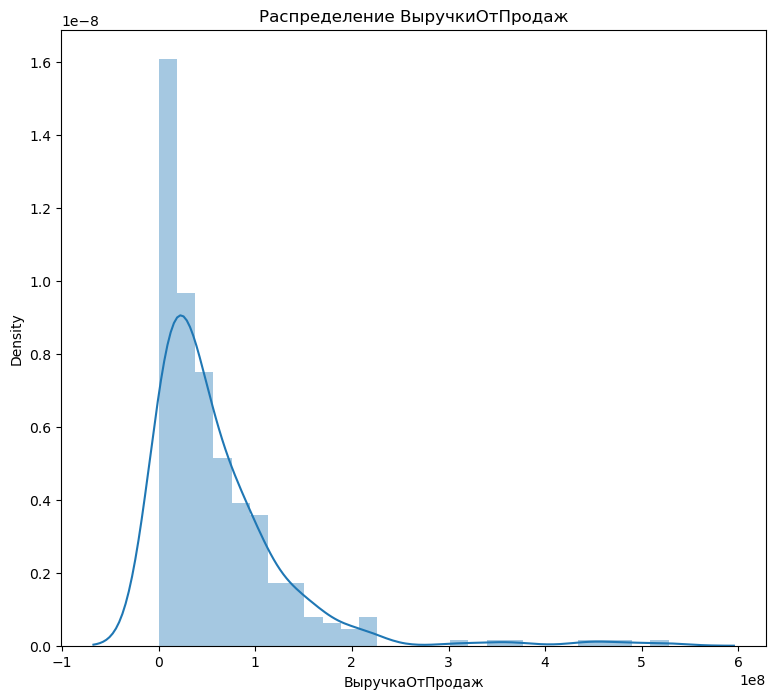

In [26]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Распределение ВыручкиОтПродаж')
sns.distplot(osno_15['ВыручкаОтПродаж'])

# plt.subplot(1,2,2)
# plt.title('Размах и медиана')
# sns.boxplot(y=osno_6['ВыручкаОтПродаж'])

plt.show()

Высокая плотность выручки до 20 млн рублей, после 20 млл разброс плотности разный

# Выводы
- Выручка клиентов до 21 млн руб, которые совершили сделку составляет 25 %, а мы считаем "Портретными" клиетам от 30 млн;
- За 5 лет, всего 39 клиетов, у которых ИНН начинается с 99;
- "Усно 6%" составляет 9,6 % от всех сделок, а мы исключаем при отборе портретных "Усно 6%";
- КодОКВЭД начинающийся 69 составляет 14.1 % от всех сделок;
- Система налогообложения по приоритету:
- a) Не известно;
- b) ОСНО;
- c) УСНО 6%;
- d) УСНО 15%;
- e) ОСНО,УСНО;
- f) Бюджет.
 
 
- Системы: ЕНВД, ЕСХН, Аутсорсинг, Патент меньше 1% сделок